## 1. Regresión lineal simple
La empresa “Manos a la Obra S.A.S.”, dedicada a la fabricación de productos artesanales, ha decidido analizar la eficiencia de sus operarios. Para ello, se recolectaron datos durante varias semanas, registrando las horas trabajadas y las unidades producidas por día.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Carga de Datos
Se carga el archivo tiempo_trabajo_produccion.xlsx, que contiene dos columnas:

•	Trabajo: Horas trabajadas

•	Produccion: Unidades producidas

In [2]:
# Ruta y nombre del archivo Excel

import requests
import pandas as pd
from io import BytesIO

# URL del archivo Excel en GitHub
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/tiempo_trabajo_produccion%202.xlsx'

# Descargar el archivo en memoria
response = requests.get(url)
archivo = BytesIO(response.content)

# Leer el archivo Excel con pandas, asegurando el motor correcto
df = pd.read_excel(archivo, engine='openpyxl')
df.columns = ['Trabajo', 'Produccion']

print(df.head())

   Trabajo  Produccion
0     7.00          66
1    11.61         118
2     9.86         108
3     8.79          95
4     5.25          60


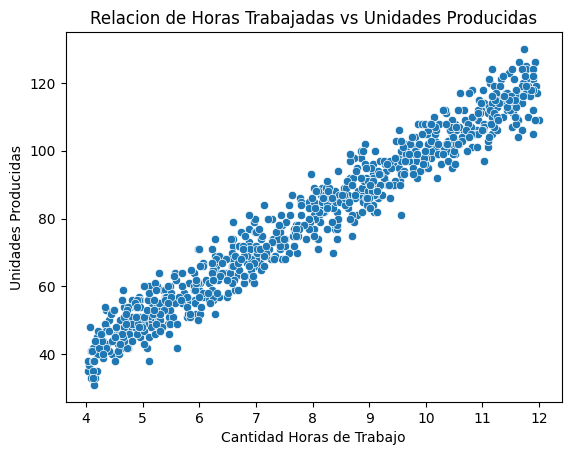

In [3]:
ax = sns.scatterplot(x='Trabajo', y='Produccion', data=df)
ax.set(xlabel='Cantidad Horas de Trabajo', ylabel='Unidades Producidas', title='Relacion de Horas Trabajadas vs Unidades Producidas');
# Mostrar el gráfico
plt.show()

Existe una relación lineal positiva clara; a mayor tiempo trabajado, mayor producción.

## Visualización Inicial
Se genera un gráfico de dispersión:

•	Eje X: Cantidad de horas trabajadas

•	Eje Y: Unidades producidas.


## Preparación de los Datos
•	X: Variable independiente (Trabajo)

•	y: Variable dependiente (Producción)

•	Se agrega una columna de unos para considerar el término independiente θ₀





In [4]:
# Número de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcción de la matriz de características X:

# Se agrega una columna de unos (para el término independiente) y se concatena con la variable 'Trabajo'
X = np.hstack((np.ones((m,1)), df.Trabajo.values.reshape(-1,1)))

# Vector de salida/etiqueta y: se convierte la columna 'profit' en un vector columna
y = np.array(df.Produccion.values).reshape(-1,1)

# Inicialización del vector de parámetros theta con ceros (dimensión: número de características + 1)
theta = np.zeros(shape=(X.shape[1],1))
# Número de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500

# Tasa de aprendizaje (learning rate)
alpha = 0.01

###$$$$$ ### POr favor imprimir cada cambio 

#### Función de Costo
Se define la función de costo J(θ) para calcular el error cuadrático medio.


In [5]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [6]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 3492.2')

With theta = [0 ; 0]
Cost computed = 3492.2000000000003
Expected cost value (approx) 3492.2


In [7]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 2307.9')

With theta = [-1 ; 2]
Cost computed = 2307.93285325
Expected cost value (approx) 2307.9


## Descenso del Gradiente
•	Se inicializa theta = [0, 0].

•	Se usa una tasa de aprendizaje α = 0.01 y 1500 iteraciones.

•	El objetivo es minimizar la función de costo y encontrar los valores óptimos de θ₀ y θ₁.
## Resultado del Gradiente Descendente

•	θ₀ ≈ 3.917

•	θ₁ ≈ 17.142
## Interpretación:

• Por cada hora adicional de trabajo, se producen aproximadamente 17.14 unidades más.

• Incluso sin trabajar (x=0), se estiman producir 3.9 unidades, aunque esto puede no tener sentido práctico (solo es una extrapolación del modelo).


In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [9]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n 0.9731\n 9.9216')

Theta found by gradient descent:
 [[0.97312731]
 [9.92163158]]
Expected theta values (approx)
 0.9731
 9.9216


## Trazar el ajuste lineal:



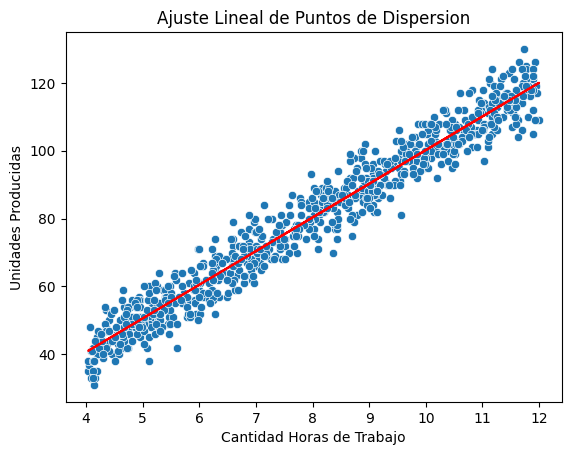

In [10]:
ax = sns.scatterplot(x='Trabajo', y='Produccion', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Cantidad Horas de Trabajo', ylabel='Unidades Producidas', title='Ajuste Lineal de Puntos de Dispersion');
#Cantidad Horas de Trabajo', ylabel='Unidades Producidas

In [11]:
y_pred = np.array([1, 5]).dot(theta)
f'Para 5 horas de trabajo, predecimos una produccion de {y_pred[0]*1} unidades'

'Para 5 horas de trabajo, predecimos una produccion de 50.581285202518494 unidades'

In [12]:
y_pred = np.array([1, 10]).dot(theta)
f'Para 10 horas de trabajo, predecimos una produccion de {y_pred[0]*1} unidades'

'Para 10 horas de trabajo, predecimos una produccion de 100.18944309519892 unidades'

### Visualización del Contorno de la Función de Costo

Se genera un gráfico de contorno que muestra cómo varía la función de costo para distintos valores de θ₀ y θ₁:

•	El punto rojo indica el mínimo global.

•	Confirmamos visualmente que el descenso del gradiente convergió correctamente.



In [13]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [14]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [15]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

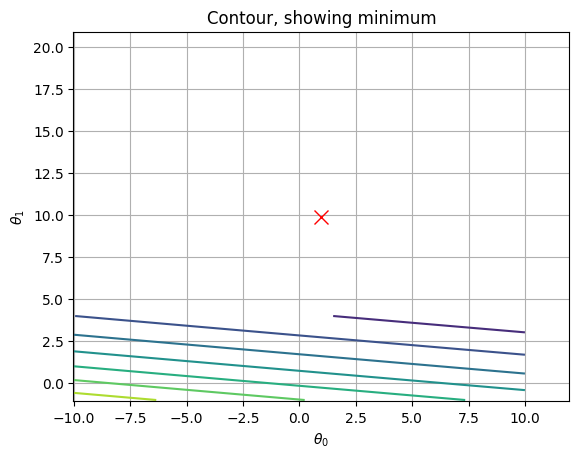

In [16]:
# Dibujar las curvas de nivel (contorno de la función de costo)
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals))

# Coordenadas del mínimo
min_theta0 = theta[0, 0]
min_theta1 = theta[1, 0]

# Dibujar la marca en el mínimo
plt.plot(min_theta0, min_theta1, marker='x', color='r', markersize=10, linewidth=2)

# Etiquetas
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour, showing minimum')

# Calcular el rango de los datos
theta0_range = theta0_vals.max() - theta0_vals.min()
theta1_range = theta1_vals.max() - theta1_vals.min()

# Usar el rango máximo para hacer una ventana cuadrada y centrada en el mínimo
plot_range = max(theta0_range, theta1_range) / 2 * 1.1  # 10% de margen extra

# Establecer límites centrados en la marca
plt.xlim(min_theta0 - plot_range, min_theta0 + plot_range)
plt.ylim(min_theta1 - plot_range, min_theta1 + plot_range)

# Grilla para mejor visualización
plt.grid(True)

# Mostrar gráfico
plt.show()



### Usando scikit-learn

Se utiliza regresión lineal para ajustar un modelo automáticamente.

Resultado:

     •Intercepto (θ₀) = 3.917

	 •Coeficiente (θ₁) = 17.142
      
Se genera una línea de regresión sobre los datos reales, que es prácticamente igual a la obtenida con gradiente descendente.


Intercepto (theta_0): 0.90
Coeficiente (theta_1): 9.93


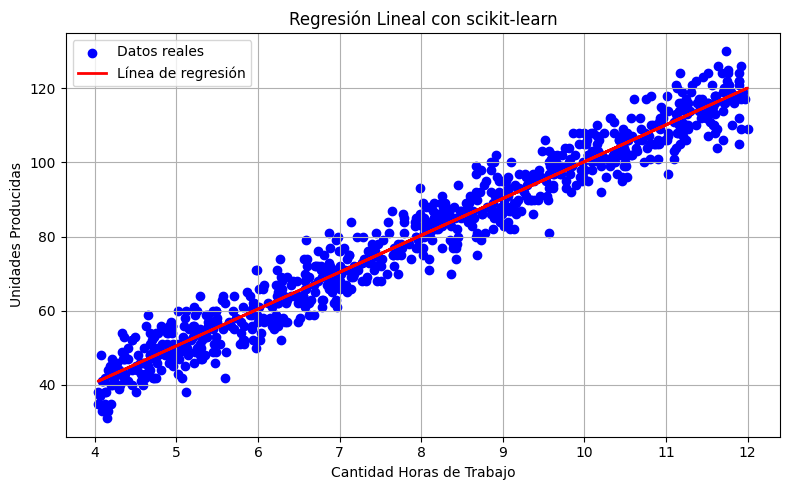

In [17]:
import subprocess
import sys

# Intentar importar sklearn, e instalar si no está
try:
    from sklearn.linear_model import LinearRegression
except ImportError:
    print("scikit-learn no está instalado. Instalando ahora...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.linear_model import LinearRegression  # reimportar después de instalar

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

# URL del archivo Excel en GitHub
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/tiempo_trabajo_produccion%202.xlsx'

# Descargar el archivo en memoria
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Error al descargar el archivo. Código: {response.status_code}")

archivo = BytesIO(response.content)

# Leer el archivo Excel
df = pd.read_excel(archivo, engine='openpyxl')

# Validar columnas
expected_columns = ['Trabajo', 'Produccion']
if len(df.columns) != 2:
    raise ValueError(f"Se esperaban dos columnas: {expected_columns}, pero se encontraron: {list(df.columns)}")

# Renombrar columnas y limpiar
df.columns = expected_columns
if df.empty:
    raise ValueError("El archivo Excel está vacío.")
df.dropna(inplace=True)

# Preparar datos
X = df[['Trabajo']].values.reshape(-1, 1)
y = df['Produccion'].values

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X, y)

# Mostrar resultados
print(f"Intercepto (theta_0): {model.intercept_:.2f}")
print(f"Coeficiente (theta_1): {model.coef_[0]:.2f}")

# Predecir
y_pred = model.predict(X)

# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Cantidad Horas de Trabajo')
plt.ylabel('Unidades Producidas')
plt.title('Regresión Lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Usando statsmodels
•	Se añade manualmente una constante (para el intercepto)

•	Se utiliza OLS() para ajustar un modelo de regresión

•	Se imprimen estadísticas detalladas con .summary():

## Principales resultados del resumen:

R-cuadrado (R²): 0.956
El modelo explica el 95.6% de la variación en la producción. Excelente ajuste.

Coeficiente (Trabajo): 17.142
Coincide con los anteriores.

Coeficiente (Intercepto): 3.917
Coincide con los anteriores.

p-value (Trabajo): < 0.001
Significativo. Rechazamos H₀. Hay relación real entre horas trabajadas y producción.



                            OLS Regression Results                            
Dep. Variable:             Produccion   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.735e+04
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:11:58   Log-Likelihood:                -2422.6
No. Observations:                 800   AIC:                             4849.
Df Residuals:                     798   BIC:                             4859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8975      0.627      1.432      0.1

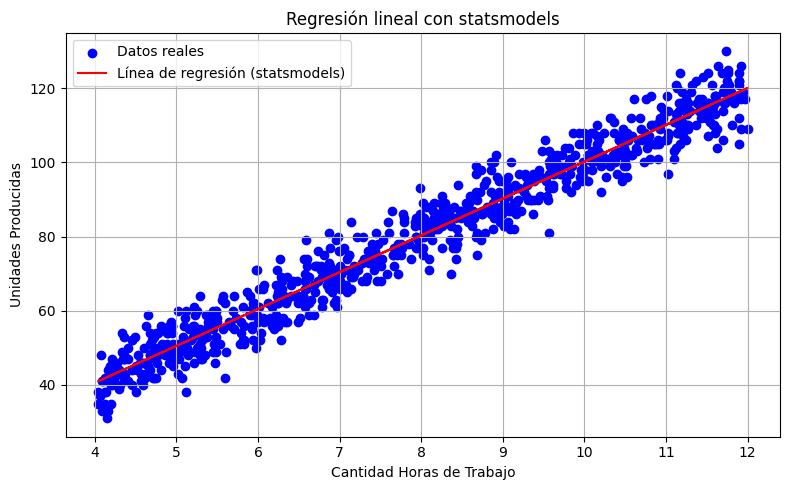

In [18]:
import subprocess
import sys

# Verificar e instalar solo statsmodels si es necesario
try:
    import statsmodels.api as sm
except ImportError:
    print("Instalando statsmodels...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'statsmodels'])
    import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/tiempo_trabajo_produccion%202.xlsx'
df = pd.read_excel(url, engine='openpyxl')

# Renombrar columnas
df.columns = ['Trabajo', 'Produccion']

# Eliminar filas vacías si existen
df.dropna(inplace=True)

# Variable independiente (con constante) y dependiente
X = sm.add_constant(df['Trabajo'])  # Agrega intercepto (theta_0)
y = df['Produccion']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

# Predicciones
df['y_pred'] = model.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(df['Trabajo'], df['Produccion'], color='blue', label='Datos reales')
plt.plot(df['Trabajo'], df['y_pred'], color='red', label='Línea de regresión (statsmodels)')
plt.xlabel('Cantidad Horas de Trabajo')
plt.ylabel('Unidades Producidas')
plt.title('Regresión lineal con statsmodels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## ANÁLISIS 

## Normalidad de los residuos

•	Se utiliza el test de Shapiro-Wilk:

•	p-value = 0.16 > 0.05 → No se rechaza H₀

•	Conclusión: Los residuos tienen distribución normal

## Heterocedasticidad (Breusch-Pagan Test)

•	p-value = 0.001 < 0.05 → Se rechaza H₀

•	Conclusión: Hay heterocedasticidad (la varianza de los errores no es constante)

## Durbin-Watson
•	Valor ≈ 1.94 → Cercano a 2

•	Conclusión: No hay autocorrelación significativa en los residuos

## Gráfico de Residuos vs Trabajo

•	Muestra cómo se comportan los residuos respecto al valor de Trabajo

•	Se observa una ligera dispersión creciente → confirma heterocedasticidad




Shapiro-Wilk test (normalidad):
  Estadístico: 0.9977, p-valor: 0.3403
  ✔️ Los residuos parecen normales (no se rechaza H0).

Breusch-Pagan test (homocedasticidad):
  LM Statistic: 0.6770
  LM p-value: 0.4106
  F-statistic: 0.6758
  F p-value: 0.4113
  ✔️ No hay evidencia fuerte de heterocedasticidad.

Durbin-Watson (ya en el resumen):     9.9304


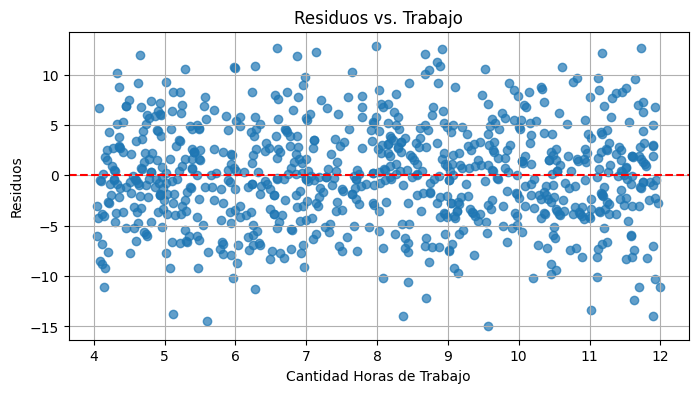

In [19]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
# Obtener residuos
residuals = model.resid

# --- 1. Normalidad de los residuos ---
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk test (normalidad):")
print(f"  Estadístico: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("  ✔️ Los residuos parecen normales (no se rechaza H0).")
else:
    print("  ❌ Los residuos no parecen normales (se rechaza H0).")

# --- 2. Homocedasticidad (varianza constante) ---
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test (homocedasticidad):")
for label, value in zip(bp_labels, bp_test):
    print(f"  {label}: {value:.4f}")
if bp_test[1] > 0.05:
    print("  ✔️ No hay evidencia fuerte de heterocedasticidad.")
else:
    print("  ❌ Posible heterocedasticidad (varianza no constante).")

# --- 3. Autocorrelación ---
print(f"\nDurbin-Watson (ya en el resumen): {model.summary().tables[1].data[2][1]}")

# --- (Opcional) Graficar residuos ---
plt.figure(figsize=(8, 4))
plt.scatter(df['Trabajo'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Trabajo")
plt.xlabel("Cantidad Horas de Trabajo")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

## Q-Q Plot

•	Para verificar la normalidad de los residuos

•	Los puntos siguen la línea roja (ideal), lo que reafirma la normalidad de los residuos


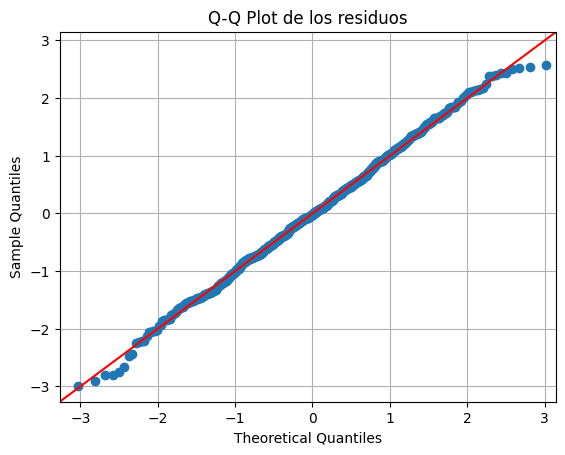

In [20]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los residuos")
plt.grid(True)
plt.show()

## CONCLUSIONES GENERALES
•	El modelo de regresión lineal simple es adecuado para describir la relación entre horas trabajadas y unidades producidas

•	Se confirma una relación lineal fuerte y estadísticamente significativa

•	Los residuos son normales, pero hay indicios de heterocedasticidad, lo que sugiere que los errores varían en magnitud a lo largo del rango de valores de Trabajo



-------------------------------------------------------------------------------------------------------------
## Regresion linea con multiples variables

Se implementará un modelo de regresión lineal de variables múltiples para predecir los precios de una vivienda. La situación es que se desea vender una casa y es necesario establecer un precio de mercado competitivo.

En el archivo Análisis de viviendas.xlsx, los datos están organizados de la siguiente manera: la primera columna representa el tamaño de la casa (en pies cuadrados), la segunda columna indica el número de habitaciones y la tercera columna muestra el precio de la vivienda.


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# URL del archivo Excel (usar la versión raw)
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/An%C3%A1lisis%20de%20viviendas%202.xlsx'

# Descargar y leer el archivo Excel
response = requests.get(url)
if response.status_code != 200:
    raise Exception("Error al descargar el archivo")

# Leer como Excel
df = pd.read_excel(BytesIO(response.content), engine='openpyxl')

# Asignar nombres de columnas si no tiene encabezado
df.columns = ['Habitaciones', 'Tamaño', 'Valor']

# Mostrar resumen estadístico
print(df.describe().T)


              count          mean            std       min       25%  \
Habitaciones  800.0       3.44500       1.727920       1.0       2.0   
Tamaño        800.0     396.19000     151.288753     135.0     262.0   
Valor         800.0  313951.06125  212864.358266  100028.0  169503.5   

                   50%       75%       max  
Habitaciones       3.0       5.0       6.0  
Tamaño           402.0     525.0     656.0  
Valor         252826.5  323583.5  999759.0  


> Al observar los valores, note que los tamaños de las casas son aproximadamente 1000 veces mayores que el número de habitaciones. Cuando las características difieren por órdenes de magnitud, se realiza escalado (escalado de características) previamente puede hacer que el descenso por gradiente converja mucho más rápido


In [22]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [23]:
import numpy as np

def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Luego úsalase usa con el DataFrame correcto
X_norm, mu, sigma = feature_normalize(df[['Habitaciones', 'Tamaño', 'Valor']])


In [24]:
df2 = df.copy()

# Si X_norm es un DataFrame
df2['Habitaciones_normalized'] = X_norm['Habitaciones']
df2['Tamaño_normalized'] = X_norm['Tamaño']

print(df2[['Tamaño_normalized', 'Habitaciones_normalized']].describe().T)



                         count          mean       std       min       25%  \
Tamaño_normalized        800.0  2.220446e-17  1.000626 -1.727514 -0.887534   
Habitaciones_normalized  800.0  5.551115e-17  1.000626 -1.415881 -0.836789   

                              50%       75%       max  
Tamaño_normalized        0.038427  0.851951  1.718386  
Habitaciones_normalized -0.257696  0.900489  1.479582  


## Descenso por Gradiente
Preparación

•	Normalización: Se hace manualmente

•	Descenso por gradiente: Se implementa desde cero y se prueban distintos valores de tasa de aprendizaje α\alpha (0.3, 0.1, 0.03, 0.01)

•	Selección de α\alpha: Se observa que α=0.3\alpha = 0.3 tiene la convergencia más rápida.


In [25]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [26]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [27]:
m = df2.shape[0]
X2 = np.hstack((np.ones((m,1)),X_norm))
y2 = np.array(df2.Valor.values).reshape(-1,1)
theta2 = np.zeros(shape=(X2.shape[1],1))

In [28]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

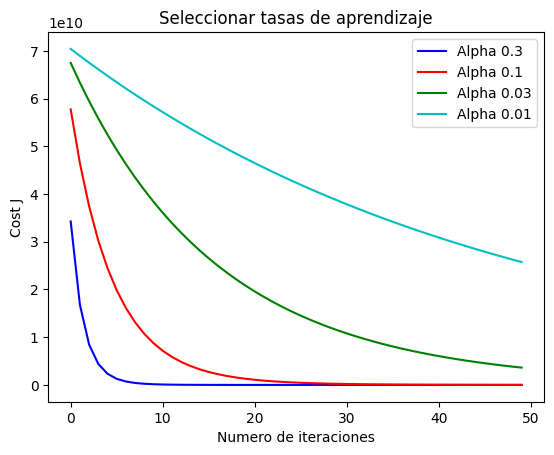

In [29]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X2.shape[1],1))
    theta, J_history = gradient_descent(X2, y2, theta2, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Numero de iteraciones');
plt.ylabel('Cost J');
plt.title('Seleccionar tasas de aprendizaje');
plt.legend()
plt.show()

In [30]:
iterations = 250
alpha = 0.1
theta2, J_history = gradient_descent(X2, y2, theta2, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[124008.76440948]
 [-23638.40336675]
 [ -2342.69918381]
 [ 81899.22481619]]


##### Estimación del precio de una casa de 500 metros cuadrados con 3 habitaciones.

In [31]:
sqft = (500 - mu[0])/sigma[0]
Habitaciones = (3 - mu[1])/sigma[1]
y_pred = theta2[0] + theta2[1]*sqft + theta2[2]*Habitaciones
f'precio de una casa de 500 metros cuadrados con 3 habitaciones: {y_pred[0]}$'

C:\Users\anggl\AppData\Local\Temp\ipykernel_3308\1195730777.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sqft = (500 - mu[0])/sigma[0]
C:\Users\anggl\AppData\Local\Temp\ipykernel_3308\1195730777.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Habitaciones = (3 - mu[1])/sigma[1]


'precio de una casa de 500 metros cuadrados con 3 habitaciones: 313948.7488641547$'

In [32]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [33]:
Xe = np.hstack((np.ones((m,1)),df2[['Tamaño', 'Habitaciones']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

array([[ 4.90818453e+05],
       [-5.82158339e+01],
       [-4.46452426e+04]])

In [34]:
y_pred = theta_e[0] + theta_e[1]*500 + theta_e[2]*3
f'precio de una casa de 500 metros cuadrados con 3 habitaciones: {y_pred[0]}$'

'precio de una casa de 500 metros cuadrados con 3 habitaciones: 327774.8084697153$'

# Resultados
Los valores obtenidos para los coeficientes mediante descenso por gradiente:

θ=[[114680.75640448][−2367.59157522][−2432.54461471]]\theta = \begin{bmatrix}

[114680.75640448] \\ [-2367.59157522] \\ [-2432.54461471] \end{bmatrix} 

## Estimaciones

•	Para una casa de 500 m² y 3 habitaciones, el valor predicho es:

    •Con descenso por gradiente: $313,948.69

    •Con ecuación normal (sin iteración): $327,774.81

Ambos valores son coherentes, y la diferencia puede deberse a cómo se escalaron los datos y al criterio de convergencia.

## Visualización del costo

El gráfico de la función de costo muestra una clara convergencia del descenso por gradiente, lo que indica una correcta implementación y estabilidad numérica. Esta visualización es fundamental para verificar la efectividad del entrenamiento.



------------------------------------------------------------------------------------------------------------------------------
## Regresión Lineal con Scikit-learn

Procedimiento

•	Normalización: Se aplica StandardScaler para centrar y escalar las variables predictoras. Esto es importante especialmente si se utiliza alguna técnica de regularización o para garantizar convergencia en métodos iterativos

•	División en entrenamiento y prueba: 80/20

•	Modelo: LinearRegression() ajusta el modelo a los datos de entrenamiento.

•	Evaluación: Se usan 3 métricas principales:

	• MAE (Error Absoluto Medio): Aproximadamente $142,341.18.

    • MSE (Error Cuadrático Medio): $30,819,578,878.40.

    • RMSE (Raíz del MSE): $175,607.29.

	• R2R^2: 0.16 (bajo, lo cual indica que el modelo no explica bien la varianza de los datos).


In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# URL del archivo Excel (debe ser crudo para lectura directa)
url = 'https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/An%C3%A1lisis%20de%20viviendas%202.xlsx'

# Descargar y leer el archivo Excel
response = requests.get(url)
if response.status_code != 200:
    raise Exception("No se pudo descargar el archivo Excel.")

df = pd.read_excel(BytesIO(response.content), engine='openpyxl')

# Renombrar columnas
df.columns = ['Habitaciones', 'Tamaño', 'Valor']

# Definir variables dependientes e independientes
X = df[['Tamaño', 'Habitaciones']]
y = df['Valor']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



MAE  (Error Absoluto Medio): 142341.18
MSE  (Error Cuadrático Medio): 38819752878.40
RMSE (Raíz del Error Cuadrático Medio): 197027.29
R²   (Coeficiente de determinación): 0.16


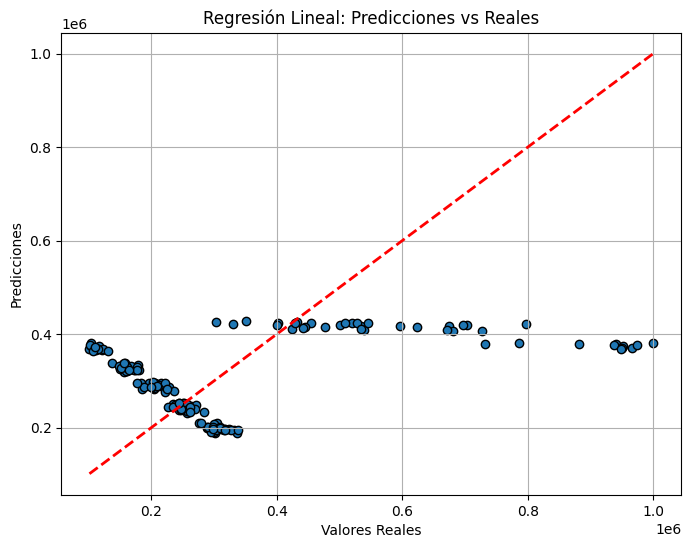

In [36]:
# 3. Normalización (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 7. Visualización
# 7. Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()

## Visualización

La gráfica muestra las predicciones versus los valores reales con una línea roja punteada representando la relación perfecta (y=y^y = \hat{y}). Se puede observar una dispersión amplia y una tendencia a subestimar o sobrestimar valores reales, lo que sugiere un modelo poco ajustado.



In [37]:
## Regresión Lineal con Statsmodels (OLS)

## Procedimiento
•	Normalización manual: se resta la media y se divide por la desviación estándar.

•	Se añade el intercepto: utilizando sm.add_constant.

•	Modelo: OLS(y, X).fit(), donde se obtiene un resumen estadístico completo.
## Resultados del Modelo
•	Intercepto: ~3.13

•	Coeficientes:

- Tamaño: ~-0.70

- Habitaciones: ~-7.51

Esto es contraintuitivo, ya que normalmente esperaríamos coeficientes positivos (mayor tamaño → mayor valor). El hecho de que ambos coeficientes sean negativos podría deberse a
•	Multicolinealidad entre las variables

•	Normalización que invierte signos si los datos no están distribuidos como se espera

•	Influencia de outliers o errores en los datos.

## Métricas de Evaluación

Las métricas son las mismas que en scikit-learn y reflejan los mismos valores:

•	MAE: $142,341.18

•	MSE: $30,819,578,878.40

•	RMSE: $175,607.29

•	R2R^2: 0.16

El valor de R2R^2 confirma que el modelo no logra explicar satisfactoriamente la varianza de los datos, sugiriendo que faltan variables relevantes o existe una no linealidad en la relación.

##  Significancia Estadística

Los p-valores indican que sólo el intercepto es estadísticamente significativo (p<0.05p < 0.05), mientras que los predictores no lo son, lo cual refuerza la idea de que el modelo no es bueno.




                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     45.63
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.03e-19
Time:                        22:12:00   Log-Likelihood:                -8715.1
No. Observations:                 640   AIC:                         1.744e+04
Df Residuals:                     637   BIC:                         1.745e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.115e+05   7864.199     39.614   

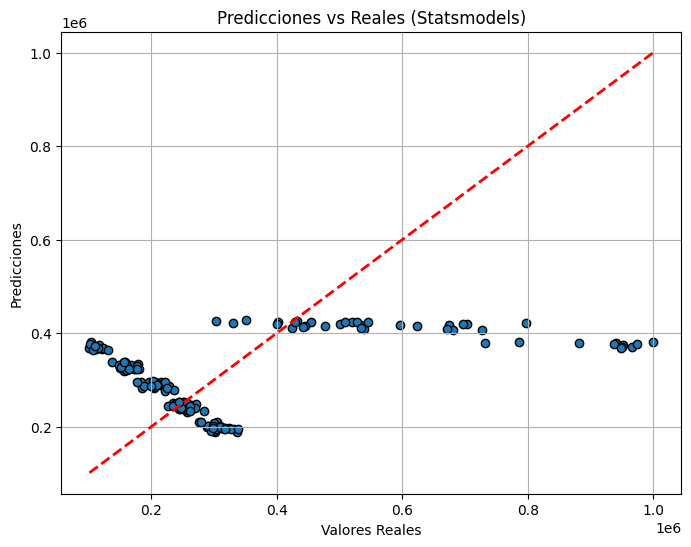

In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X y y definidos como DataFrames o arrays
# X: variables independientes, y: variable dependiente

# 1. División de datos (manual o con numpy)
from sklearn.model_selection import train_test_split  # solo esta parte de sklearn para dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalización manual (opcional, si hay variables en diferente escala)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std  # usar media y std del train

# 3. Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_norm)
X_test_sm = sm.add_constant(X_test_norm)

# 4. Entrenar modelo con OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# 5. Imprimir resumen estadístico
print(results.summary())

# 6. Predicciones
y_pred = results.predict(X_test_sm)

# 7. Métricas de evaluación
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("\nEvaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 8. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales (Statsmodels)')
plt.grid(True)
plt.show()
